In [2]:
pip install scikit_learn

In [3]:
import numpy as np
import pandas as pd
import difflib#sometimes user make mistake with movies name spelling wrong name of the movies this package make easier by searching closest to it
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
movies_data=pd.read_csv("/content/drive/MyDrive/Copy of movies.csv")

In [5]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
movies_data.shape

(4803, 24)

In [7]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [8]:
movies_features=['genres','keywords','overview','cast','director']
print(movies_features)

['genres', 'keywords', 'overview', 'cast', 'director']


In [9]:
#replacing the null  values with null string
for feature in movies_features:
  movies_data[feature]=movies_data[feature].fillna('')

In [10]:
#combining all the 5 selected features
combined_features=movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['overview']+' '+movies_data['cast']+' '+movies_data['director']

In [11]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      When ambitious New York attorney Sam is sent...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [12]:
#converting the text data into feature vectors
vectorizer=TfidfVectorizer()

In [13]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [14]:
print(feature_vectors)

  (0, 4207)	0.14134939369355703
  (0, 13932)	0.09005342709214369
  (0, 22773)	0.16033494305632573
  (0, 17493)	0.13142966756625357
  (0, 15307)	0.1833221037154887
  (0, 25464)	0.12399508683964489
  (0, 29137)	0.1611598924647531
  (0, 24418)	0.17001325611252707
  (0, 23212)	0.17974229527730723
  (0, 30041)	0.1611598924647531
  (0, 29650)	0.1951670832651365
  (0, 23253)	0.11818096973136863
  (0, 5149)	0.18147249173534674
  (0, 975)	0.13142966756625357
  (0, 1202)	0.05788886334551426
  (0, 21177)	0.1833221037154887
  (0, 1238)	0.03465540214110977
  (0, 19335)	0.17513520635418361
  (0, 10181)	0.1486646138988693
  (0, 2910)	0.11046857573745401
  (0, 27074)	0.15800227764002825
  (0, 2624)	0.10562294973544058
  (0, 4049)	0.067806465440421
  (0, 17733)	0.11869162784514985
  (0, 28138)	0.16672644228889758
  :	:
  (4802, 26724)	0.06809397308595068
  (4802, 18937)	0.0640212903261547
  (4802, 11719)	0.08180139518749079
  (4802, 29200)	0.07747795289570394
  (4802, 9175)	0.0768590349620255
  (4802, 

Cosine Similarity

In [15]:
#getting the similarity scores using cosine similarity
similarity=cosine_similarity(feature_vectors)


In [16]:
print(similarity)
print(similarity.shape)

[[1.         0.03405403 0.03366926 ... 0.0198114  0.0312866  0.0070467 ]
 [0.03405403 1.         0.03105138 ... 0.03489247 0.02038452 0.01381278]
 [0.03366926 0.03105138 1.         ... 0.02802907 0.05202542 0.01180564]
 ...
 [0.0198114  0.03489247 0.02802907 ... 1.         0.03743513 0.03653328]
 [0.0312866  0.02038452 0.05202542 ... 0.03743513 1.         0.03078044]
 [0.0070467  0.01381278 0.01180564 ... 0.03653328 0.03078044 1.        ]]
(4803, 4803)


<ipython-input-18-c66381fe27de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=movies_data.corr(method='pearson')


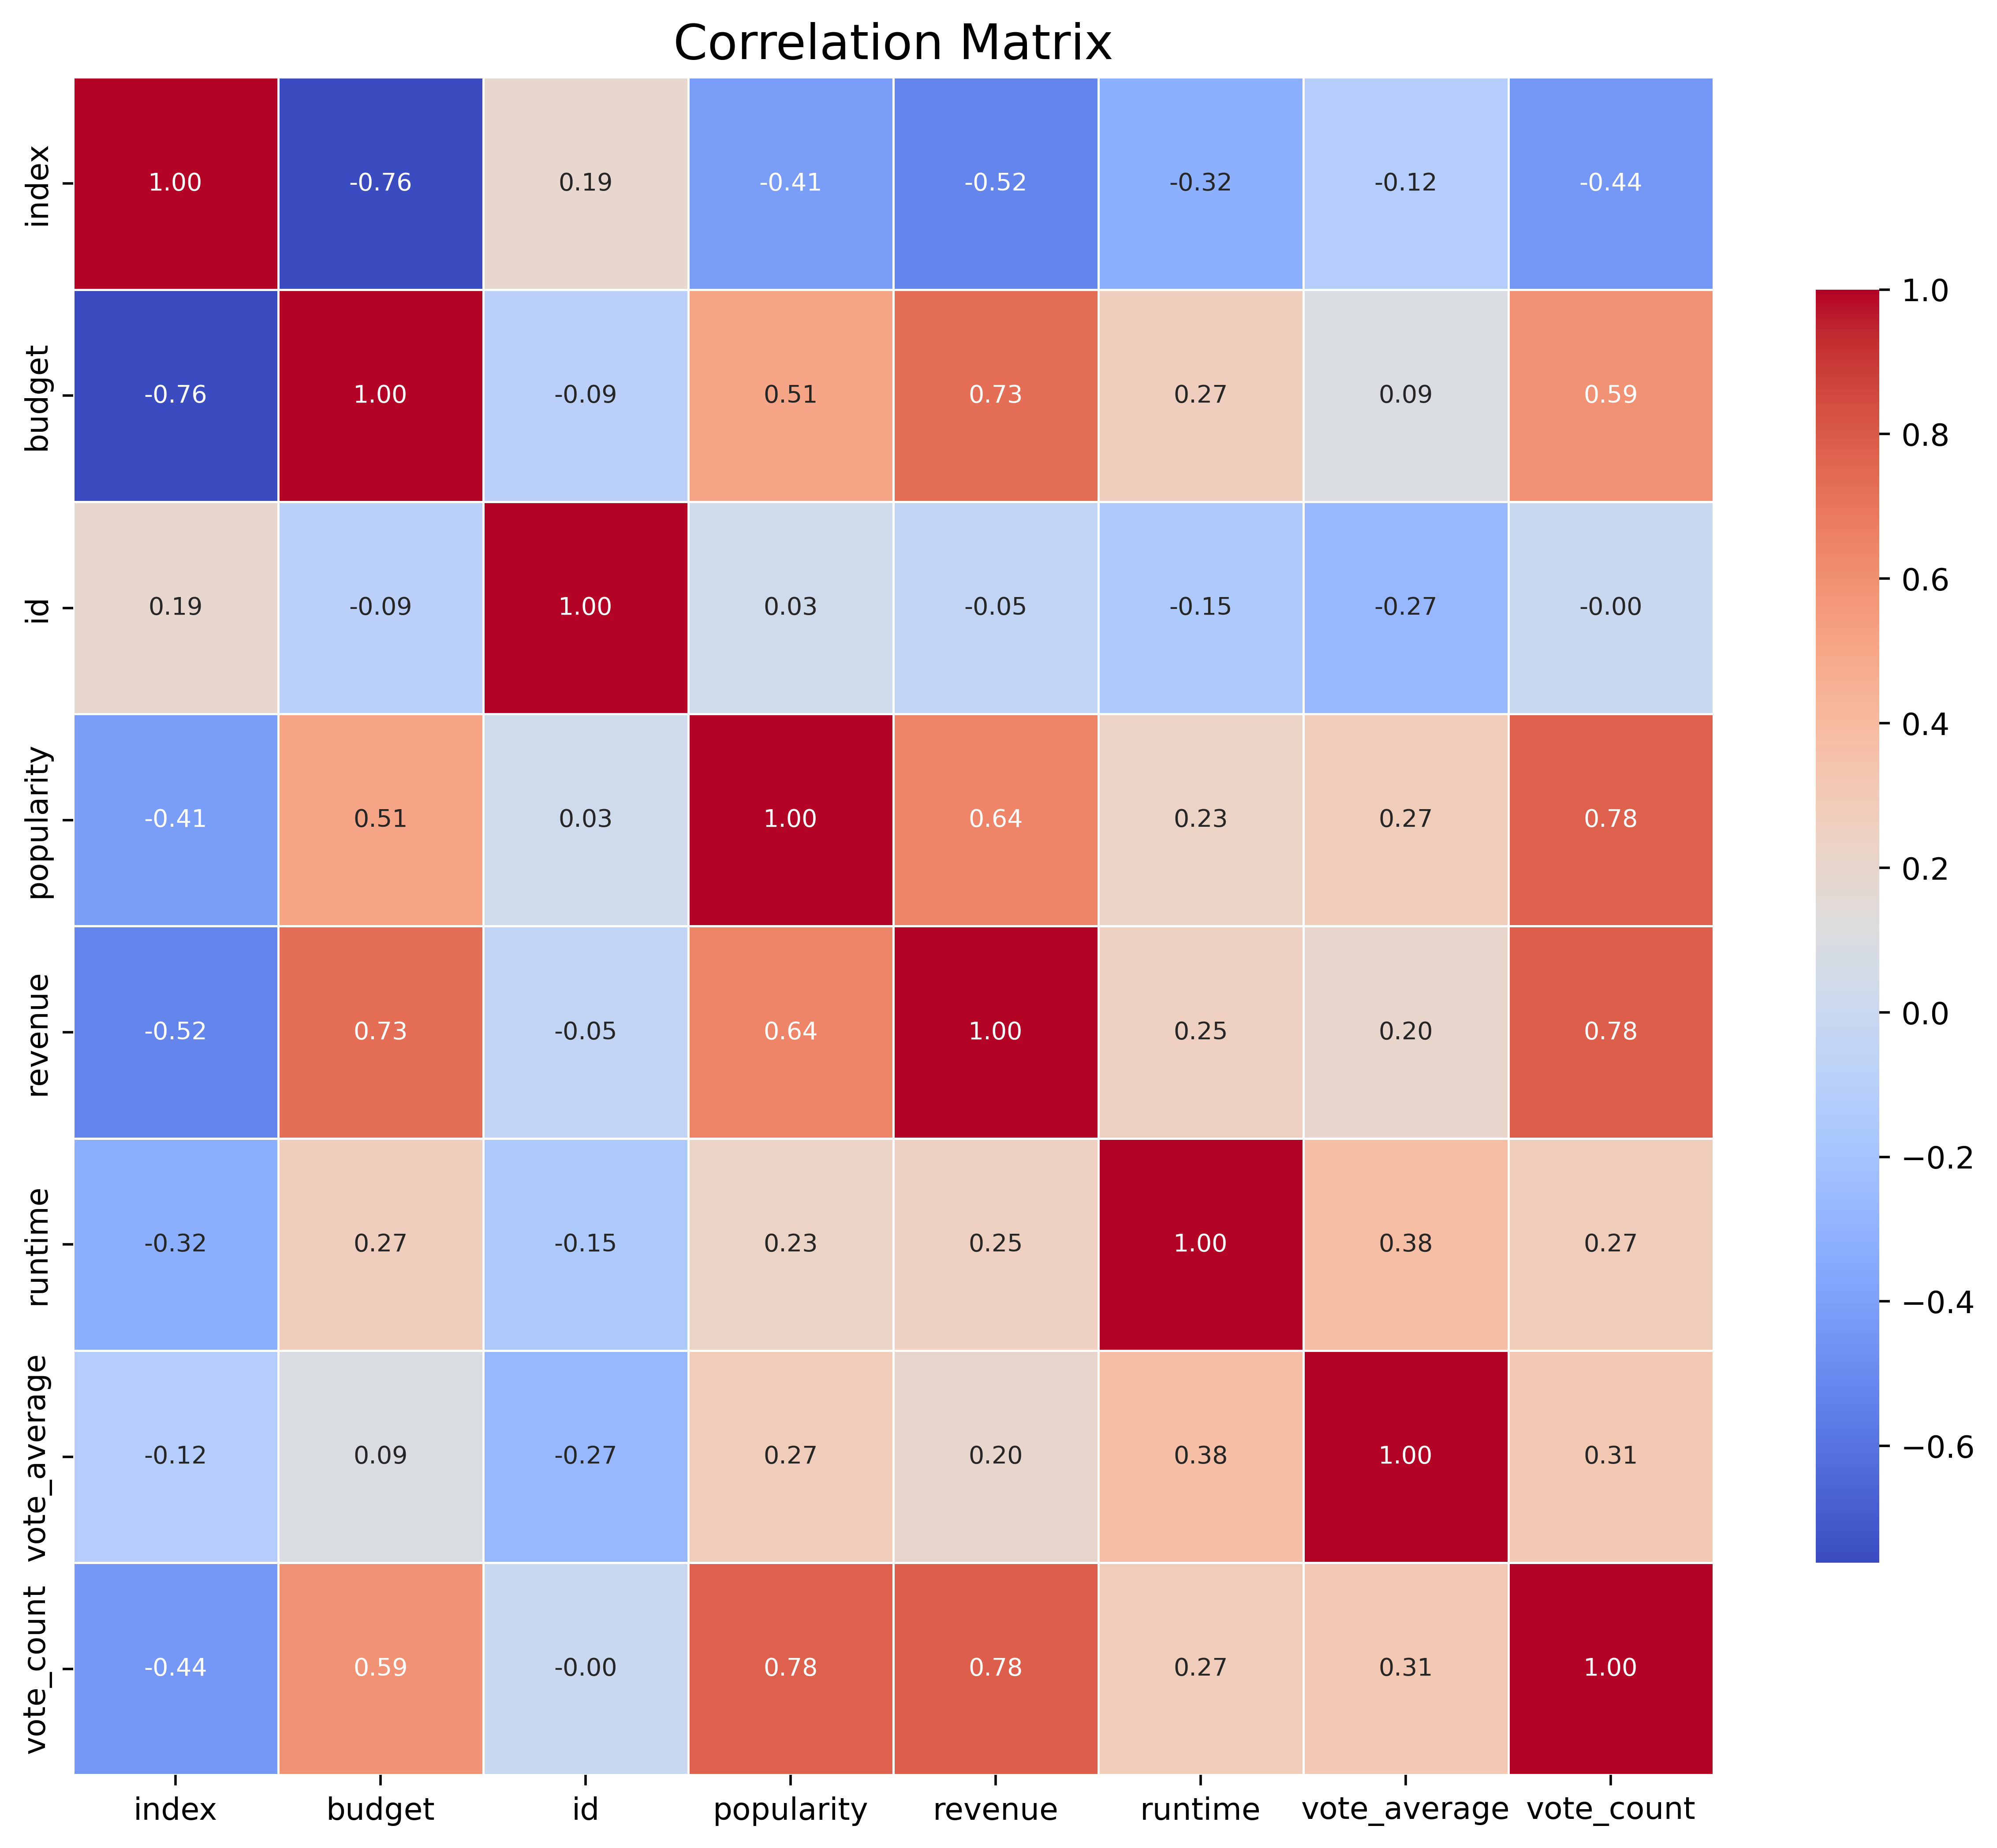

In [18]:
corr=movies_data.corr(method='pearson')
plt.figure(figsize=(12,10), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5,cmap="coolwarm",cbar_kws={"shrink": 0.75},annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [19]:
#getting the movie name from the user
movie_name=input("Enter your favourite movie name:")

Enter your favourite movie name:iron man


In [20]:
list_of_all_titles=movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
#finding the close match for the movie name given by the user

find_close_match=difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [22]:
close_match=find_close_match[0]
print(close_match)

Iron Man


In [23]:
#finding the index of the movie with title
index_of_the_movie=movies_data[movies_data.title==close_match]['index'].values[0]
print(index_of_the_movie)

68


In [24]:
#getting a list of similar movies

similarity_score=list(enumerate(similarity[index_of_the_movie]))#enumerate is basically is used to carry out loop in a list
print(similarity_score)

[(0, 0.0561505799701677), (1, 0.03401732994623017), (2, 0.012064859537367162), (3, 0.00717893263092069), (4, 0.026603003762420873), (5, 0.01571942483641135), (6, 0.02085262428098871), (7, 0.18866378018547286), (8, 0.01184477139447955), (9, 0.039120557168678176), (10, 0.04052502145983595), (11, 0.014437581522556944), (12, 0.011486038774828247), (13, 0.011661904214599325), (14, 0.06273515298611317), (15, 0.03165258118360541), (16, 0.14469485758134001), (17, 0.017406671392341977), (18, 0.01877068680188796), (19, 0.03704939231724614), (20, 0.039338557025078734), (21, 0.028044224275424315), (22, 0.00550954333617719), (23, 0.02118580205710172), (24, 0.014640483549900583), (25, 0.003967179496946251), (26, 0.1243153196610412), (27, 0.0331466050500315), (28, 0.0413690758845896), (29, 0.010414365607093112), (30, 0.08443891270886644), (31, 0.27983974060634287), (32, 0.02015903491851579), (33, 0.08276268282485755), (34, 0.0012739781566889024), (35, 0.022458594352442324), (36, 0.02407339707522877),

In [25]:
len(similarity_score)

4803

In [26]:
#sorting the movies based on their similarity score

sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse= True)#movie[1]-->1.0
print(sorted_similar_movies)

[(68, 1.0), (79, 0.3302883516827091), (31, 0.27983974060634287), (7, 0.18866378018547286), (16, 0.14469485758134001), (511, 0.1264411562923594), (26, 0.1243153196610412), (4401, 0.12274078684924541), (3623, 0.11469015253800395), (64, 0.10867604016639343), (182, 0.1008736209692106), (174, 0.09392055905517475), (783, 0.09335712384088662), (4033, 0.09320244217024788), (46, 0.09042783410277172), (94, 0.08842442376094754), (3466, 0.087260262478754), (420, 0.08465167684832095), (30, 0.08443891270886644), (203, 0.08345347304922134), (33, 0.08276268282485755), (3133, 0.0808497831319397), (1135, 0.08064965409153521), (2229, 0.08058131635724881), (2235, 0.08032223915006609), (138, 0.08031829062849051), (122, 0.07996630439577924), (788, 0.07929530356638335), (1233, 0.07889498763845794), (2487, 0.07763387710615863), (1282, 0.07741667254811552), (318, 0.07708053253259248), (725, 0.07704606684254396), (2186, 0.07695329588747561), (2625, 0.07682482953004208), (126, 0.0764973025319684), (2651, 0.07633

In [27]:
#print the name of similar movies based on the index
print("Movies suggested for you:\n")

i=1

for movie in sorted_similar_movies:
  index=movie[0]#0-->68(index)
  title_from_index=movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i,'.',title_from_index)
    i+=1

Movies suggested for you:

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . X-Men
7 . Captain America: Civil War
8 . The Helix... Loaded
9 . Made
10 . X-Men: Apocalypse
11 . Ant-Man
12 . The Incredible Hulk
13 . Mortdecai
14 . Super
15 . X-Men: Days of Future Past
16 . Guardians of the Galaxy
17 . Sliding Doors
18 . Hellboy II: The Golden Army
19 . Spider-Man 2
20 . X2
21 . X-Men: The Last Stand
22 . The Devil's Tomb
23 . Lord of War
24 . Machete Kills
25 . A Scanner Darkly
26 . The Last Airbender
27 . X-Men Origins: Wolverine
28 . Deadpool
29 . Get Rich or Die Tryin'


Movie Recommendation System

In [28]:
movie_name=input("Enter your favourite movie name:")

list_of_all_titles=movies_data['title'].tolist()


find_close_match=difflib.get_close_matches(movie_name, list_of_all_titles)


close_match=find_close_match[0]


index_of_the_movie=movies_data[movies_data.title==close_match]['index'].values[0]


similarity_score=list(enumerate(similarity[index_of_the_movie]))#enumerate is basically is used to carry out loop in a list


sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse= True)#movie[1]-->1.0


print("Movies suggested for you:\n")

i=1

for movie in sorted_similar_movies:
  index=movie[0]#0-->68(index)
  title_from_index=movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i,'.',title_from_index)
    i+=1


Enter your favourite movie name:pirates of caribbean
Movies suggested for you:

1 . Pirates of the Caribbean: At World's End
2 . Pirates of the Caribbean: Dead Man's Chest
3 . Pirates of the Caribbean: The Curse of the Black Pearl
4 . Anna and the King
5 . Thor
6 . The Corruptor
7 . Dragonball Evolution
8 . Mamma Mia!
9 . Arn: The Knight Templar
10 . The Lord of the Rings: The Return of the King
11 . The Replacement Killers
12 . Curse of the Golden Flower
13 . The Children of Huang Shi
14 . Crouching Tiger, Hidden Dragon
15 . Star Trek Into Darkness
16 . The Lone Ranger
17 . Exorcist: The Beginning
18 . Elizabethtown
19 . Bulletproof Monk
20 . Angels & Demons
21 . Pirates of the Caribbean: On Stranger Tides
22 . The Three Musketeers
23 . Rango
24 . The Glass House
25 . The Tourist
26 . Cinderella
27 . The Pirates! In an Adventure with Scientists!
28 . Hercules
29 . The Other Side of Heaven
